In [31]:
import numpy as np
import itertools
import random
from collections import defaultdict

# all mixed strategies on the simplex for 3 actions
def generate_simplex_grid(step=0.1):
    points = []
    n = int(1 / step)
    for i in range(n + 1):
        for j in range(n + 1 - i):
            k = n - i - j
            p = np.array([i, j, k]) * step
            if np.isclose(np.sum(p), 1.0):
                points.append(p)
    return points

# select a random point from the grid based on the mixed strategy
def randomized_rounding(p, grid):
    dists = np.array([np.linalg.norm(p - g) for g in grid])
    min_dist = np.min(dists)
    closest = [grid[i] for i, d in enumerate(dists) if np.isclose(d, min_dist)]
    return random.choice(closest)

# best response function for a player given the opponent's strategy
def best_response(opponent_strategy, payoff_matrix):
    expected_payoffs = payoff_matrix @ opponent_strategy
    best_actions = np.argwhere(expected_payoffs == np.max(expected_payoffs)).flatten()
    return np.random.choice(best_actions)

# one-hot vector
def one_hot(a, num_actions=3):
    v = np.zeros(num_actions)
    v[a] = 1
    return v

# running the simulation of Rock-Paper-Scissors
def simulate_rps(num_rounds, step=0.1):
    grid = generate_simplex_grid(step)
    K = len(grid)

    num_actions = 3
    payoff_1 = np.array([[0, -1, 1], [1, 0, -1], [-1, 1, 0]])
    payoff_2 = -payoff_1

    calibration_1 = defaultdict(lambda: np.zeros(num_actions))
    calibration_2 = defaultdict(lambda: np.zeros(num_actions))

    empirical_play_1 = []
    empirical_play_2 = []

    for t in range(1, num_rounds + 1):
        forecast_1 = np.mean([v for v in calibration_2.values()], axis=0) if calibration_2 else np.array([1/3, 1/3, 1/3])
        forecast_2 = np.mean([v for v in calibration_1.values()], axis=0) if calibration_1 else np.array([1/3, 1/3, 1/3])

        rounded_forecast_1 = randomized_rounding(forecast_1, grid)
        rounded_forecast_2 = randomized_rounding(forecast_2, grid)

        a1 = best_response(rounded_forecast_2, payoff_1)
        a2 = best_response(rounded_forecast_1, payoff_2)

        calibration_1[tuple(rounded_forecast_1)] += one_hot(a1) - rounded_forecast_1
        calibration_2[tuple(rounded_forecast_2)] += one_hot(a2) - rounded_forecast_2

        empirical_play_1.append(one_hot(a1))
        empirical_play_2.append(one_hot(a2))

    avg_strategy_1 = np.mean(empirical_play_1, axis=0)
    avg_strategy_2 = np.mean(empirical_play_2, axis=0)

    return avg_strategy_1, avg_strategy_2, empirical_play_1, empirical_play_2


In [32]:
avg_1, avg_2, emp_1, emp_2 = simulate_rps(num_rounds=20000, step=0.1)
print("Empirical strategy of Player 1:", avg_1)
print("Empirical strategy of Player 2:", avg_2)

Empirical strategy of Player 1: [0.3333  0.33335 0.33335]
Empirical strategy of Player 2: [0.3333  0.33345 0.33325]


In [33]:
rock_1 = [emp_1[i][0] for i in range(len(emp_1))]
paper_1 = [emp_1[i][1] for i in range(len(emp_1))]
scissors_1 = [emp_1[i][2] for i in range(len(emp_1))]

rock_2 = [emp_2[i][0] for i in range(len(emp_2))]
paper_2 = [emp_2[i][1] for i in range(len(emp_2))]
scissors_2 = [emp_2[i][2] for i in range(len(emp_2))]

rock_plot_1 = np.cumsum(rock_1) / np.arange(1, len(rock_1) + 1)
paper_plot_1 = np.cumsum(paper_1) / np.arange(1, len(paper_1) + 1)
scissors_plot_1 = np.cumsum(scissors_1) / np.arange(1, len(scissors_1) + 1)

rock_plot_2 = np.cumsum(rock_2) / np.arange(1, len(rock_2) + 1)
paper_plot_2 = np.cumsum(paper_2) / np.arange(1, len(paper_2) + 1)
scissors_plot_2 = np.cumsum(scissors_2) / np.arange(1, len(scissors_2) + 1)

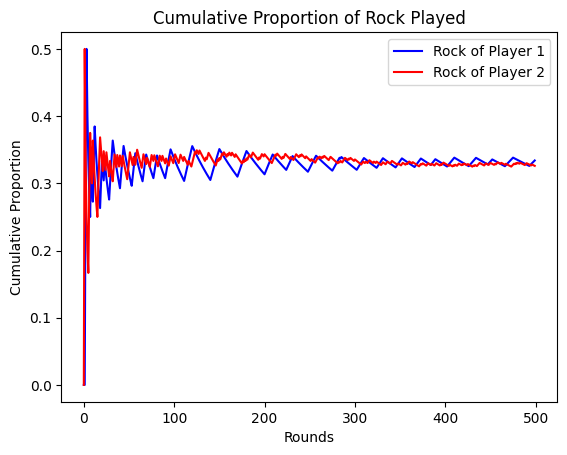

In [34]:
# plotting
import matplotlib.pyplot as plt
plt.plot(rock_plot_1[:500], label='Rock of Player 1', color = 'blue')
plt.plot(rock_plot_2[:500], label='Rock of Player 2', color = 'red')
plt.xlabel('Rounds')
plt.ylabel('Cumulative Proportion')
plt.title('Cumulative Proportion of Rock Played')
plt.legend()
plt.show()

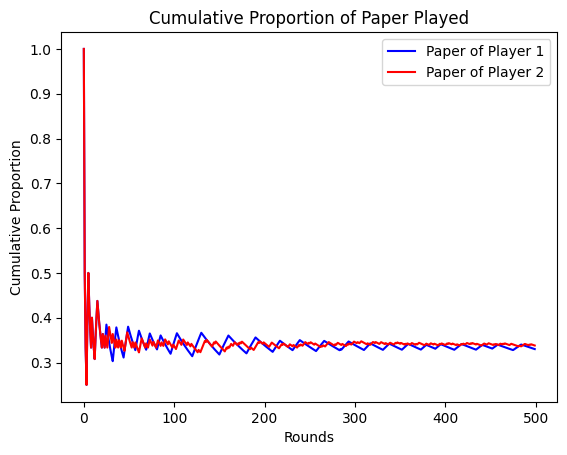

In [35]:
plt.plot(paper_plot_1[:500], label='Paper of Player 1', color = 'blue')
plt.plot(paper_plot_2[:500], label='Paper of Player 2', color = 'red')
plt.xlabel('Rounds')
plt.ylabel('Cumulative Proportion')
plt.title('Cumulative Proportion of Paper Played')
plt.legend()
plt.show()

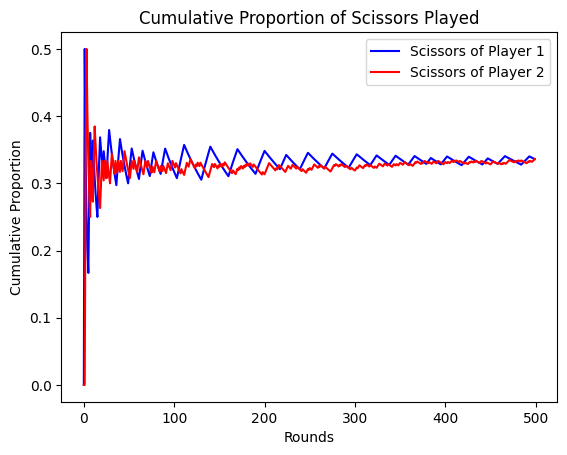

In [36]:
plt.plot(scissors_plot_1[:500], label='Scissors of Player 1', color = 'blue')
plt.plot(scissors_plot_2[:500], label='Scissors of Player 2', color = 'red')
plt.xlabel('Rounds')
plt.ylabel('Cumulative Proportion')
plt.title('Cumulative Proportion of Scissors Played')
plt.legend()
plt.show()